In [1]:
# Loading in the Data
import pandas as pd
gss_data = pd.read_excel("./result/GSS.xlsx")
print(gss_data.size)
gss_data.head()

723900


,year,id_,indus10,spind10,childs,age,earnrs,income,rincome,ballot
0,1972,1,Clothing stores,.i: Inapplicable,0,23,1,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
1,1972,2,Newspaper publishers,.i: Inapplicable,5,70,0,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
2,1972,3,Real estate,Real estate,4,48,2,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
3,1972,4,Clothing stores,Public finance activities,0,27,2,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
4,1972,5,Wired telecommunications carriers,Nonferrous metal (except aluminum) production ...,2,61,1,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable


In [2]:
# Filtering for Before 2000
gss_data["year"] = pd.to_numeric(gss_data["year"], errors="coerce")
gss_data = gss_data.dropna(subset=["year"])
gss_data = gss_data[gss_data["year"] >= 2000]
gss_data.head()

,year,id_,indus10,spind10,childs,age,earnrs,income,rincome,ballot
38116,2000,1,Radio and television broadcasting and cable su...,.i: Inapplicable,0,26,0,.n: No answer,$8000 TO 9999,Ballot a
38117,2000,2,Executive offices and legislative bodies,.i: Inapplicable,2,48,1,"$8,000 to $9,999",$8000 TO 9999,Ballot c
38118,2000,3,.i: Inapplicable,.i: Inapplicable,5,67,0,"$15,000 to $19,999",.i: Inapplicable,Ballot b
38119,2000,4,Veterinary services,.i: Inapplicable,1,39,1,"$25,000 or more",.i: Inapplicable,Ballot b
38120,2000,5,Scientific research and development services,.i: Inapplicable,0,25,1,"$25,000 or more",.i: Inapplicable,Ballot b


In [3]:
# Seeing Different Income Categories
gss_data["income"].unique()

array(['.n:  No answer', '$8,000 to $9,999', '$15,000 to $19,999',
       '$25,000 or more', '$20,000 to $24,999', '$10,000 to $14,999',
       '.r:  Refused', '$1,000 to $2,999',
       '.d:  Do not Know/Cannot Choose', 'Under $1,000',
       '$5,000 to $5,999', '$7,000 to $7,999', '$3,000 to $3,999',
       '$4,000 to $4,999', '$6,000 to $6,999', '.i:  Inapplicable',
       '.s:  Skipped on Web'], dtype=object)

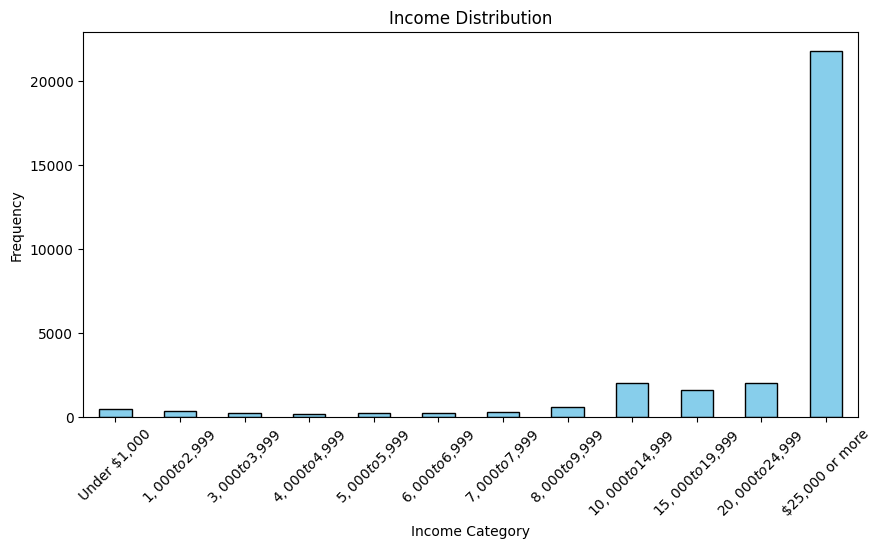

In [4]:
# Removing Unnecessary Categories
gss_data = gss_data[~gss_data["income"].isin([".n:  No answer", ".r:  Refused", ".d:  Do not Know/Cannot Choose", ".i:  Inapplicable", 
                                              ".s:  Skipped on Web"])] 
# Showing Income Category Counts
import matplotlib.pyplot as plt

income_order = ["Under $1,000", "$1,000 to $2,999", "$3,000 to $3,999", "$4,000 to $4,999", "$5,000 to $5,999",
                "$6,000 to $6,999", "$7,000 to $7,999", "$8,000 to $9,999", "$10,000 to $14,999", "$15,000 to $19,999",
                "$20,000 to $24,999", "$25,000 or more"]
gss_data["income"] = pd.Categorical(gss_data["income"], categories=income_order, ordered=True)
income_counts = gss_data["income"].value_counts().reindex(income_order)

plt.figure(figsize=(10, 5))
income_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Income Category")
plt.ylabel("Frequency")
plt.title("Income Distribution")
plt.xticks(rotation=45)
plt.show()

In [5]:
# Removing Under $10,000
gss_data = gss_data[gss_data["income"].isin(["$10,000 to $14,999", "$15,000 to $19,999", "$20,000 to $24,999", "$25,000 or more"])] 
print(gss_data.size)
gss_data.head()

275570


,year,id_,indus10,spind10,childs,age,earnrs,income,rincome,ballot
38118,2000,3,.i: Inapplicable,.i: Inapplicable,5,67,0,"$15,000 to $19,999",.i: Inapplicable,Ballot b
38119,2000,4,Veterinary services,.i: Inapplicable,1,39,1,"$25,000 or more",.i: Inapplicable,Ballot b
38120,2000,5,Scientific research and development services,.i: Inapplicable,0,25,1,"$25,000 or more",.i: Inapplicable,Ballot b
38122,2000,7,Miscellaneous retail stores,.i: Inapplicable,0,36,1,"$25,000 or more",$25000 OR MORE,Ballot a
38123,2000,8,Real estate,.i: Inapplicable,2,44,1,"$20,000 to $24,999",$7000 TO 7999,Ballot c


In [6]:
# Seeing Different Ages and Children Counts
print(gss_data["age"].unique())
print(gss_data["childs"].unique())

['67' '39' '25' '36' '44' '47' '53' '52' '51' '40' '77' '45' '48' '49'
 '19' '54' '72' '89 or older' '55' '37' '33' '43' '29' '31' '26' '46' '65'
 '56' '66' '20' '64' '59' '27' '61' '34' '32' '70' '75' '22' '80' '24'
 '83' '50' '78' '30' '62' '57' '60' '38' '41' '58' '63' '42' '21' '28'
 '35' '79' '71' '73' '68' '84' '23' '74' '18' '76' '82' '81'
 '.n:  No answer' '88' '69' '86' '85' '87' '.i:  Inapplicable']
['5' '1' '0' '2' '3' '4' '8 or more' '6' '7'
 '.d:  Do not Know/Cannot Choose' '.n:  No answer' '.s:  Skipped on Web'
 '.i:  Inapplicable']


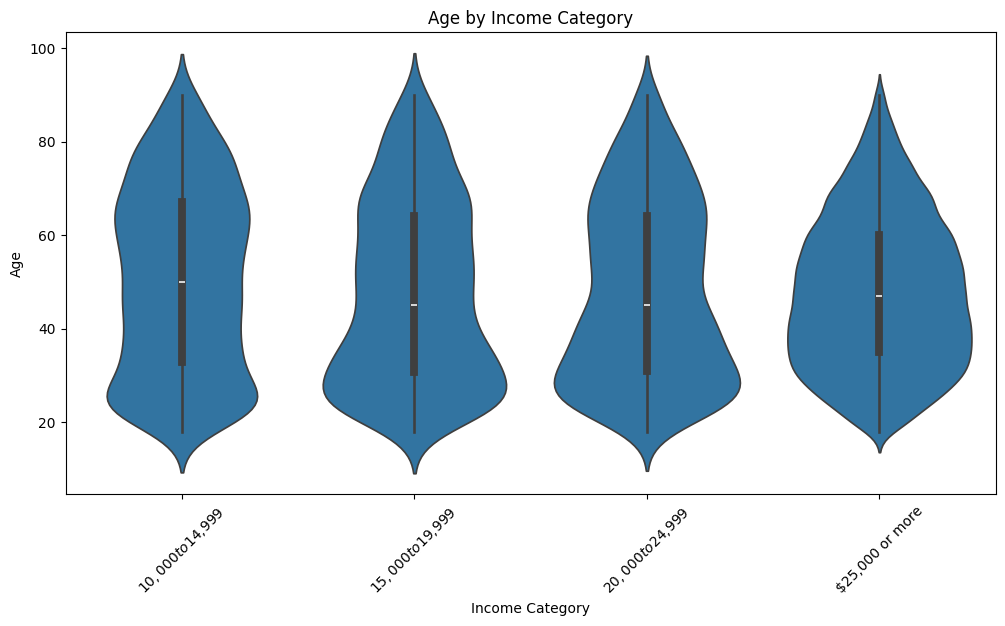

In [7]:
# Removing Unnecessary Categories
gss_data = gss_data[~gss_data["age"].isin([".n:  No answer", ".i:  Inapplicable"])] 
gss_data["age"] = gss_data["age"].replace("89 or older", 90).astype(int)
gss_data["age"] = pd.to_numeric(gss_data["age"], errors="coerce")
gss_data = gss_data.dropna(subset=["age"])

# Plotting the Age Distribution Against Income
import seaborn as sns

income_order = ["$10,000 to $14,999", "$15,000 to $19,999",
                "$20,000 to $24,999", "$25,000 or more"]
gss_data["income"] = pd.Categorical(gss_data["income"], categories=income_order, ordered=True)
plt.figure(figsize=(12, 6))

sns.violinplot(x=gss_data["income"], y=gss_data["age"])
plt.xlabel("Income Category")
plt.ylabel("Age")
plt.title("Age by Income Category")
plt.xticks(rotation=45)
plt.show()

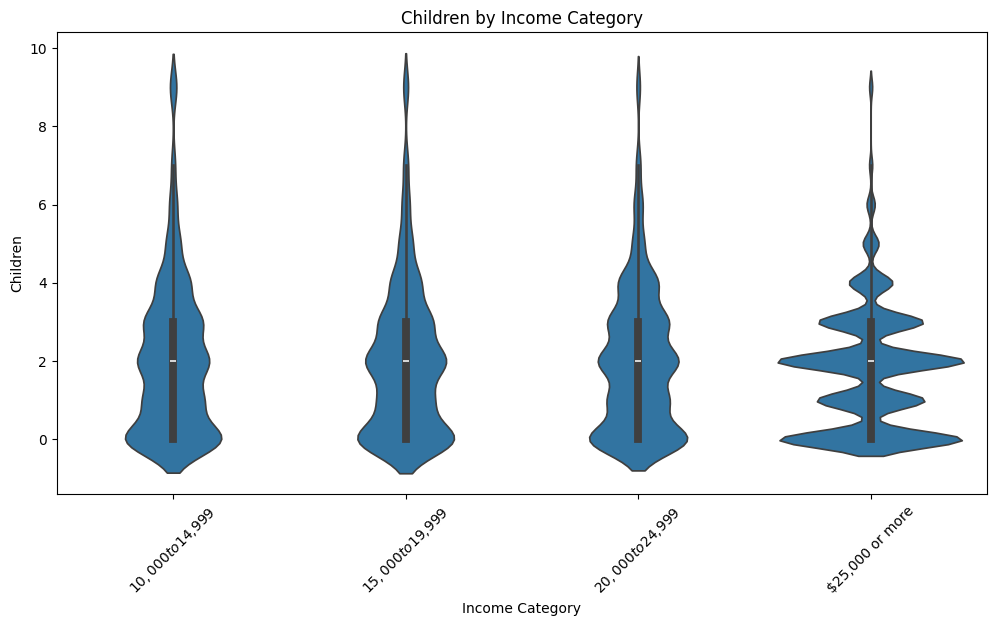

In [9]:
# Removing Unnecessary Categories
gss_data = gss_data[~gss_data["childs"].isin([".n:  No answer", ".d:  Do not Know/Cannot Choose", ".i:  Inapplicable", 
                                              ".s:  Skipped on Web"])] 
gss_data["childs"] = gss_data["childs"].replace("8 or more", 9).astype(int)
gss_data["childs"] = pd.to_numeric(gss_data["childs"], errors="coerce")
gss_data = gss_data.dropna(subset=["childs"])

# Plotting the Children Distribution Against Income
plt.figure(figsize=(12, 6))

sns.violinplot(x=gss_data["income"], y=gss_data["childs"])
plt.xlabel("Income Category")
plt.ylabel("Children")
plt.title("Children by Income Category")
plt.xticks(rotation=45)
plt.show()

In [10]:
# Creating an Interaction Between Age and Children
gss_data["adjusted_children"] = gss_data["childs"] + 1
gss_data["age_children_interaction"] = gss_data["age"] * gss_data["adjusted_children"]

gss_data = gss_data[gss_data["age_children_interaction"] > 0]

print(gss_data.size)
gss_data.head()

326352


,year,id_,indus10,spind10,childs,age,earnrs,income,rincome,ballot,adjusted_children,age_children_interaction
38118,2000,3,.i: Inapplicable,.i: Inapplicable,5,67,0,"$15,000 to $19,999",.i: Inapplicable,Ballot b,6,402
38119,2000,4,Veterinary services,.i: Inapplicable,1,39,1,"$25,000 or more",.i: Inapplicable,Ballot b,2,78
38120,2000,5,Scientific research and development services,.i: Inapplicable,0,25,1,"$25,000 or more",.i: Inapplicable,Ballot b,1,25
38122,2000,7,Miscellaneous retail stores,.i: Inapplicable,0,36,1,"$25,000 or more",$25000 OR MORE,Ballot a,1,36
38123,2000,8,Real estate,.i: Inapplicable,2,44,1,"$20,000 to $24,999",$7000 TO 7999,Ballot c,3,132


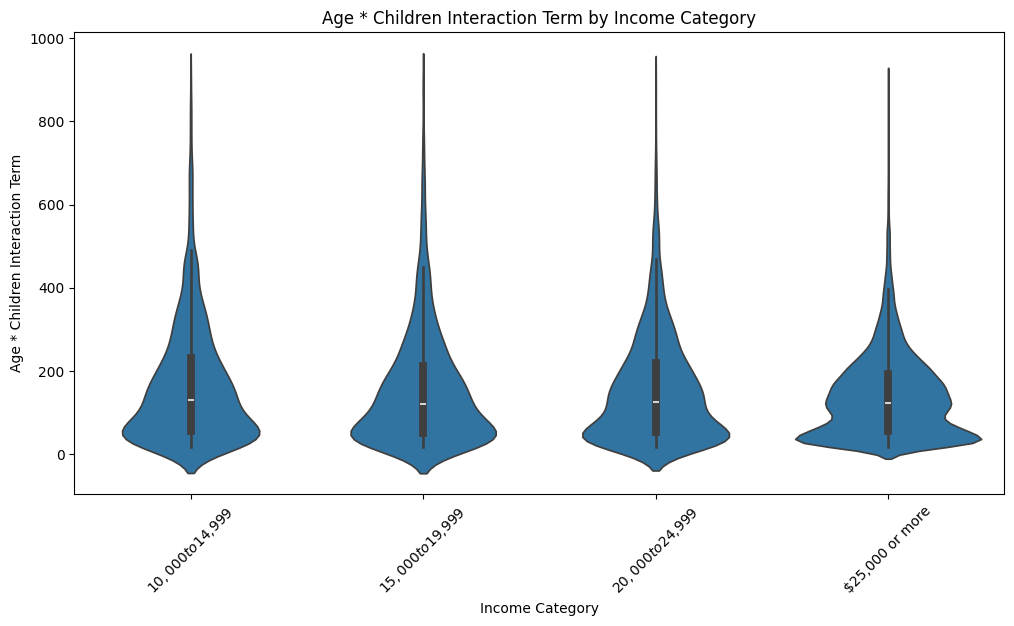

In [11]:
# Plotting the Distribution Against Income
plt.figure(figsize=(12, 6))

sns.violinplot(x=gss_data["income"], y=gss_data["age_children_interaction"])
plt.xlabel("Income Category")
plt.ylabel("Age * Children Interaction Term")
plt.title("Age * Children Interaction Term by Income Category")
plt.xticks(rotation=45)
plt.show()

# Findings

I wanted to look into whether someone's age and number of children played into their income. I realized midway through that income was a categorical variable, so this doesn't give that clear of results, but we are able to assume a few things from the violin plot. I chose pretty basic variables as I didn't want my data to get too noisy for myself and then filtered based on assumption. My first assumption was that relavant data likely wouldn't occur after the year 2000, so I filtered the dataset to only be from years 2000 and on. It is also key to note that I only chose variables that GSS showed was taken for all recent years. After inspecting the data, I found that not a lot of respondants fell below the $10,000 income category, so I removed all responses who fell under that category to make the data easier to work with. First, I took a look at Age vs. Income Category. We see a large cluster of the $25,000 or more income category between 35 and 55. We expect this as this is usually when people are making the most money in their careers. What is interesting to me is the density of people making $10,000 to $14,999 between 60 to 65. Normally, we associate this age with retirement and stopping any sort of income, but my assumption is that with people downsizing nowadays and the cost of living, they still need to make a livable wage while enjoying some free time. It is either that or due to social security. Next, I plotted number of children against income category. This one is a little more interesting. People always talk about how expensive kids are, so it is no surprise that a dense amount of $25,000 or more people fall at either 0 or 1 kid, but we also see a good amount at 3 or 4 kids. In order to feed your family that large, you need to be making a substantial amount of money. For the families normalized at 9 (originally 8 or more), we see more of them fall under the $10,000 to $19,999 half, which could be a little concering. If there are 4-child families that are looking to make $25,000+ from one spouse in order to satisfy their needs, how are 9+ family households surviving off of $10,000? Of course, further research would help us dive deeper into this question. Where are they located? A 2-kid family in New York or Washington D.C. will need to make more money than a 5-kid family in Kansas. Did they even fill the survey out correctly? The issue with consensus data is that this could be a 70 year-old filling out the survey counting all of her grand-children in as children. We just don't know what kind of response and data we are getting. I then wanted to create an interaction term to see if anything would change or stick out. Ultimately, nothing really did besides the confirmation of having a higher income with 0 children. In order to account for no kids, I added 1 to that value so that someone who is 50 with 0 kids would have an interaction term of 50 and then someone who is 25 with 1 kid would also have an interaction term of 50. This is where our data may be noisy and not really fulfilling, so the alone violin plots are better to go based off of. I think with some further research and variable distinction, we can get some good findings. I wish income was numerical and not categorical, but you can't have everything. 